# **PCA**

Missing Values:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Duplicate Rows: 0


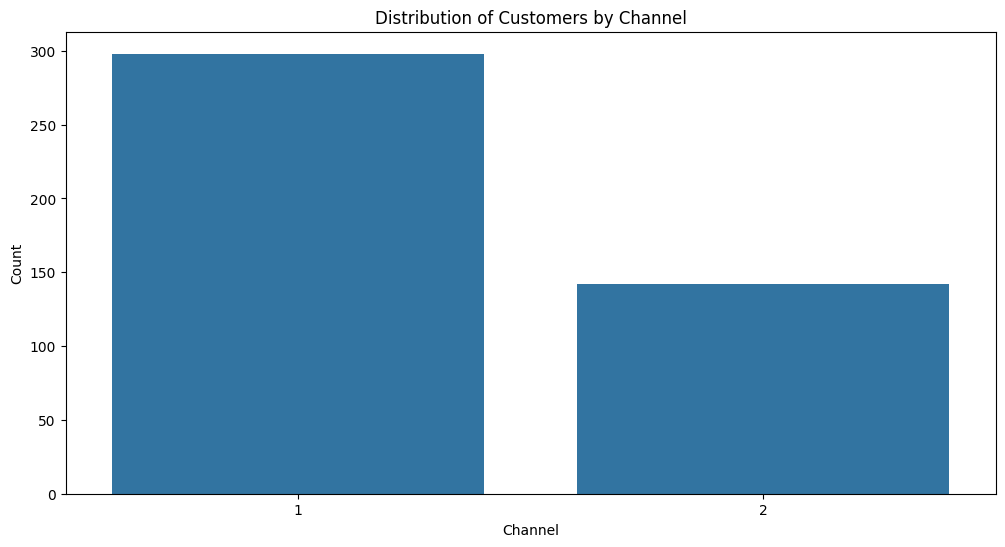

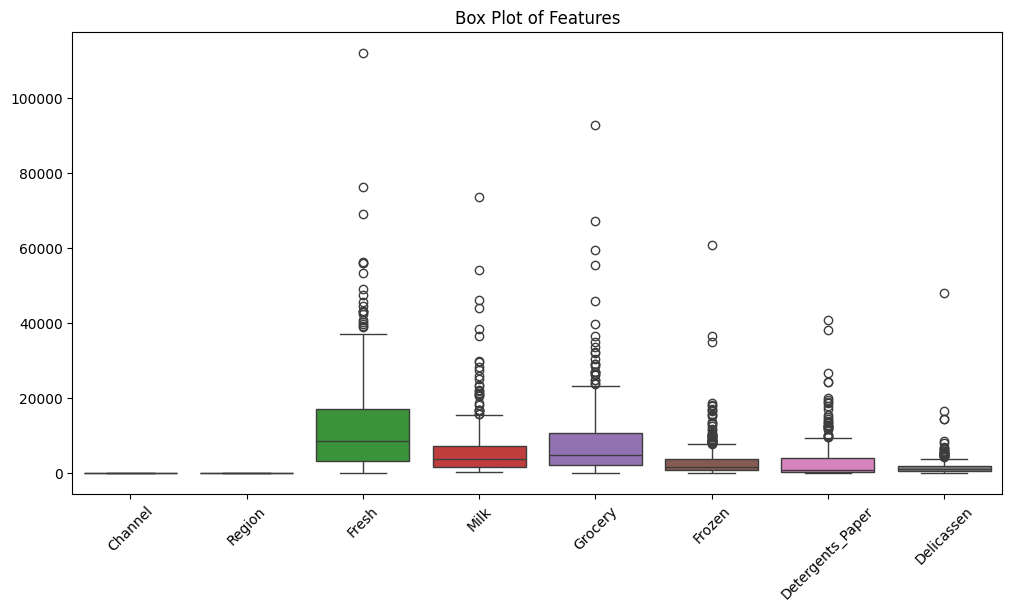

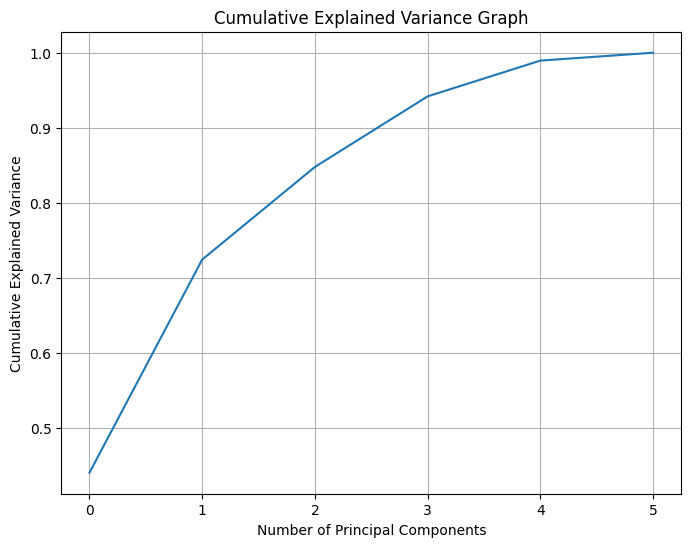


Explained Variance for each Principal Component:
[0.44082893 0.283764   0.12334413 0.09395504 0.04761272 0.01049519]


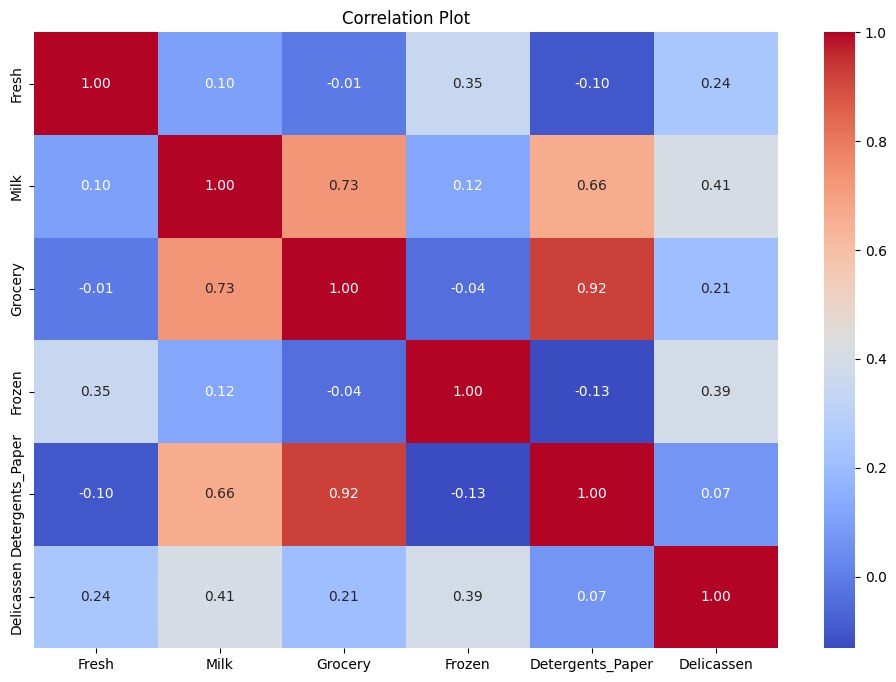

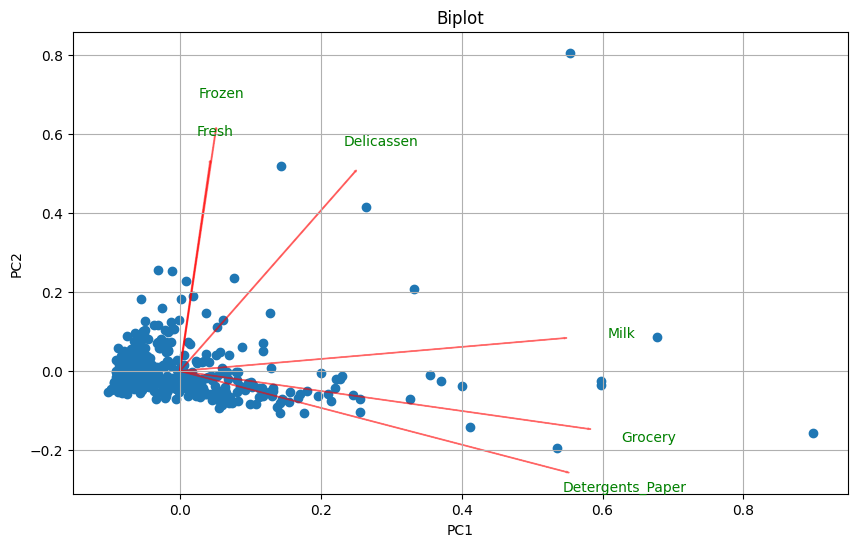

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data = pd.read_csv(url)

# Perform data cleaning and preprocessing
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)

# Remove duplicate rows
data = data.drop_duplicates()

# Perform EDA with bar plots and box plots
plt.figure(figsize=(12, 6))
sns.countplot(x='Channel', data=data)
plt.title('Distribution of Customers by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.show()

# Drop unnecessary columns
data_cleaned = data.drop(['Channel', 'Region'], axis=1)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# Cumulative explained variance graph
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Graph')
plt.grid()
plt.show()

# Print explained variance for each principal component
print("\nExplained Variance for each Principal Component:")
print(pca.explained_variance_ratio_)

# Correlation plot
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(scaled_data, columns=data_cleaned.columns).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

# Biplot
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c=labels)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, data_cleaned.columns[i], color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

plt.figure(figsize=(10, 6))
biplot(pca_data[:, :2], np.transpose(pca.components_[:2, :]), labels=None)
plt.title('Biplot')
plt.show()


# **K Means**

Missing Values:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Duplicate Rows: 0


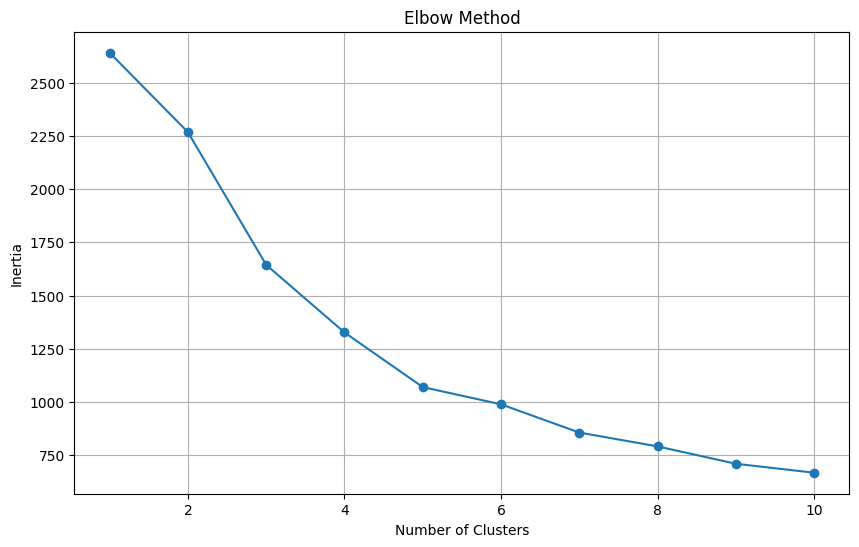


Optimal number of clusters: 3


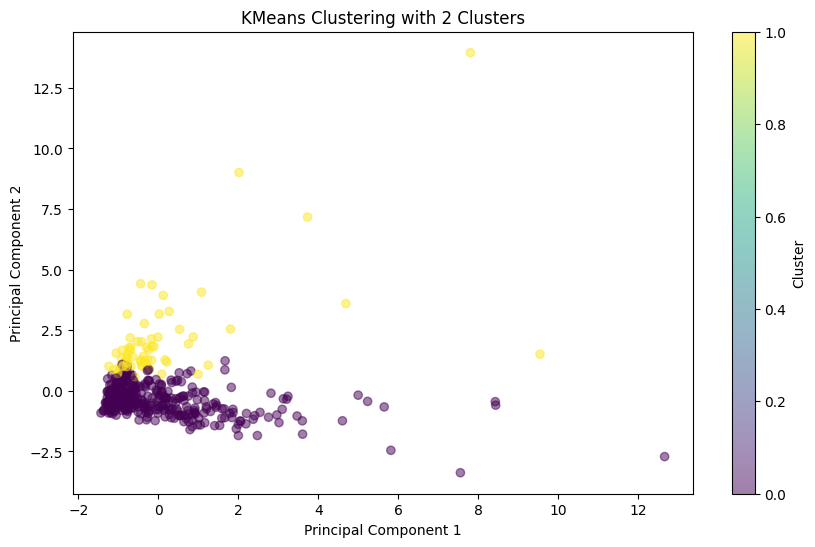

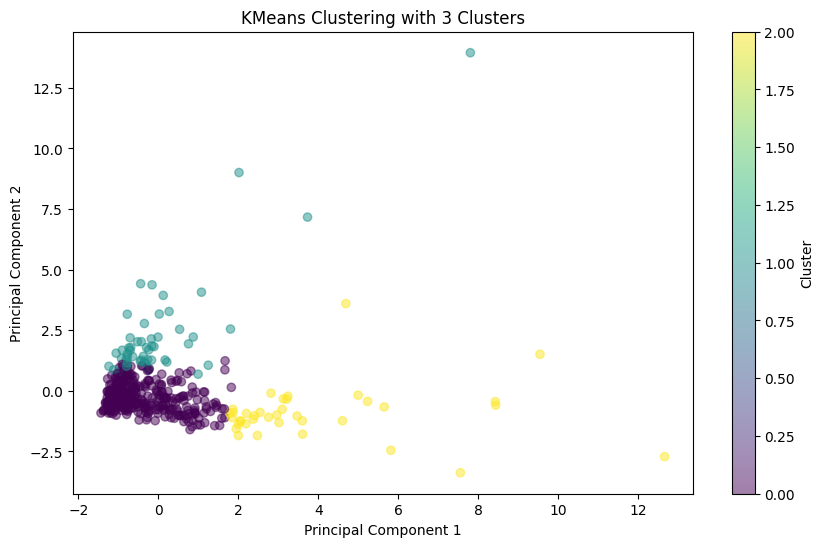


Cluster centers for 3 clusters:
[[-0.24260351 -0.21266148 -0.22157224 -0.18656872 -0.20323381 -0.15007652]
 [ 1.78420858  0.00869407 -0.19264494  1.39607954 -0.39896023  0.75947859]
 [-0.26086015  1.99920893  2.37190452 -0.23495033  2.49396554  0.33174095]]

Number of data points in each cluster:
{0: 350, 1: 53, 2: 37}


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data = pd.read_csv(url)

# Perform data cleaning and preprocessing
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)

# Remove duplicate rows
data = data.drop_duplicates()

# Drop unnecessary columns
data_cleaned = data.drop(['Channel', 'Region'], axis=1)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Elbow graph for finding the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Print optimal number of clusters based on Elbow Method
optimal_clusters = 3  # Change this based on the elbow plot
print("\nOptimal number of clusters:", optimal_clusters)

# Scatter plot for 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(scaled_data)
labels_2 = kmeans_2.labels_

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels_2, cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering with 2 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Scatter plot for 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(scaled_data)
labels_3 = kmeans_3.labels_

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels_3, cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering with 3 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Print cluster centers
print("\nCluster centers for 3 clusters:")
print(kmeans_3.cluster_centers_)

# Print number of data points in each cluster
unique, counts = np.unique(labels_3, return_counts=True)
print("\nNumber of data points in each cluster:")
print(dict(zip(unique, counts)))
